## Introduction
By analyzing the datasets below, we will answer the following questions:
1. Overall, what is the safest way of producing a best selling video game for the Nintendo Switch?
2. Independent of Nintendo, what is the safest way of producing a best selling video game for the Nintendo Switch?
3. What is the least safest way of producing a best selling video game for the Nintendo Switch?

The first dataset, and the one that will be analyzed the most, `best_selling_switch_games.csv`, contains data on the best selling video games for the Nintendo Switch. The second dataset, `3DS_video_games.csv`, contains data on the best selling video games for the Nintendo 3DS. The third dataset, `best-selling-gameboy.csv`, contains data on the best selling video games for the Gameboy. All three of these datasets include the name, number of copies sold, genre, developer, and publisher, of every best selling video game for their console.

For context, the Nintendo Switch, Nintendo 3DS, and Gameboy are all portable video game consoles produced by the multinational video game company, Nintendo, with each console being released in 2017, 2011, and 1989 respectively.

Before going into this analysis, understand that whenever the phrase "least popular" is used, what it is referring to is the least popular out of the best selling Nintendo Switch video games, and not all of the video games for the Nintendo Switch.

Data Sources:
* Best Selling Nintendo Switch Video Games: https://www.kaggle.com/datasets/kabhishm/best-selling-nintendo-switch-video-games
* Best Selling Nintendo 3DS Video Games:
https://www.kaggle.com/datasets/kabhishm/list-of-bestselling-nintendo-3ds-video-games
* Best Selling Game Boy Video Games: https://www.kaggle.com/datasets/mattop/best-selling-game-boy-video-games

In [ ]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read csv files into dataframes
switch = pd.read_csv("best_selling_switch_games.csv")
n3DS = pd.read_csv("3DS_video_games.csv")
gameboy = pd.read_csv("best-selling-gameboy.csv")

## Quantitative Data Summary

                               copies sold (per million)
developer                                               
Nintendo EPD                                      226.11
Game Freak                                         64.09
NDcube                                             30.64
Bandai Namco StudiosSora Ltd.                      29.53
ILCA                                               14.92


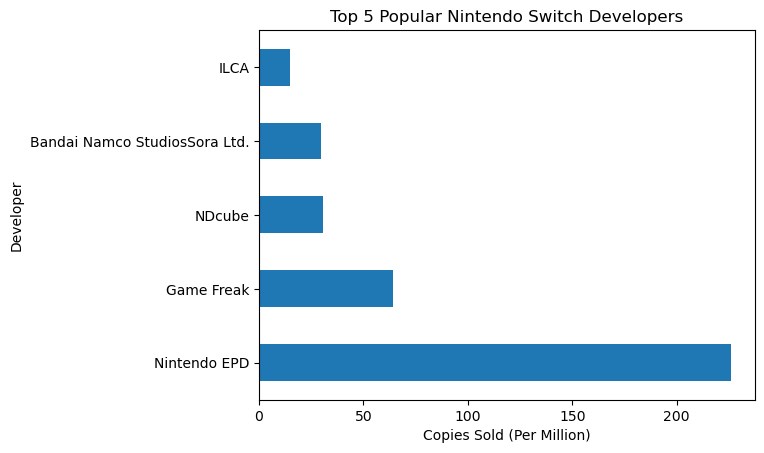

In [3]:
qDF = switch.groupby('developer').sum().sort_values(by='copies_sold', ascending=False).head()
qDF['copies_sold'] = qDF['copies_sold'].div(pow(10,6)).round(2)

print(qDF.rename(columns={'copies_sold': 'copies sold (per million)'}))

#plot
qDF.plot.barh(legend=False, title="Top 5 Popular Nintendo Switch Developers")
plt.xlabel('Copies Sold (Per Million)')
plt.ylabel('Developer')
plt.show()

The horizontal bar chart above shows the top five popular Nintendo Switch developers, or the five developers that have sold the greatest number of copies of best selling games for the Nintendo Switch. Overall, Nintendo EPD (Entertainment Planning & Development) is the most popular Nintendo Switch developer by a margin of 162.02 million video game copies sold. Excluding developers controlled or owned by Nintendo, however, Game Freak is the most popular Nintendo Switch developer, having sold 64.09 million copies of best selling Switch games.

                          copies sold (per million)
developer                                          
Marvelous                                       1.0
Atlus                                           1.0
Noble Muffins                                   1.0
Dodge Roll                                      1.0
Nintendo EPD, indieszero                        1.2


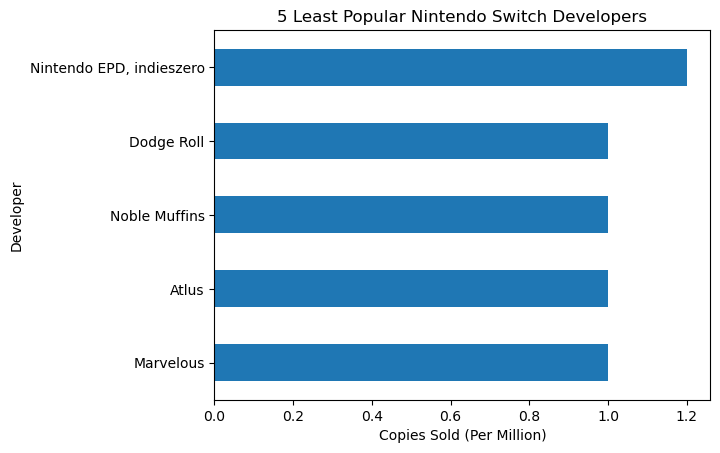

In [4]:
qDF1 = switch.groupby('developer').sum().sort_values(by='copies_sold', ascending=True).head()
qDF1['copies_sold'] = qDF1['copies_sold'].div(pow(10,6)).round(2)

print(qDF1.rename(columns={'copies_sold': 'copies sold (per million)'}))

#plot
qDF1.plot.barh(legend=False, title='5 Least Popular Nintendo Switch Developers')
plt.xlabel('Copies Sold (Per Million)')
plt.ylabel('Developer')

plt.show()

The horizontal bar chart above shows the five least popular Nintendo Switch developers, or the five developers that have sold the least number of copies of best selling games for the Nintendo Switch. Dodge Roll, Noble Muffins, Atlus, and Marvelous are tied as the very least popular Nintendo switch developers, each having sold 1.0 million copies of best selling Switch games.

## Categorical Data Summary

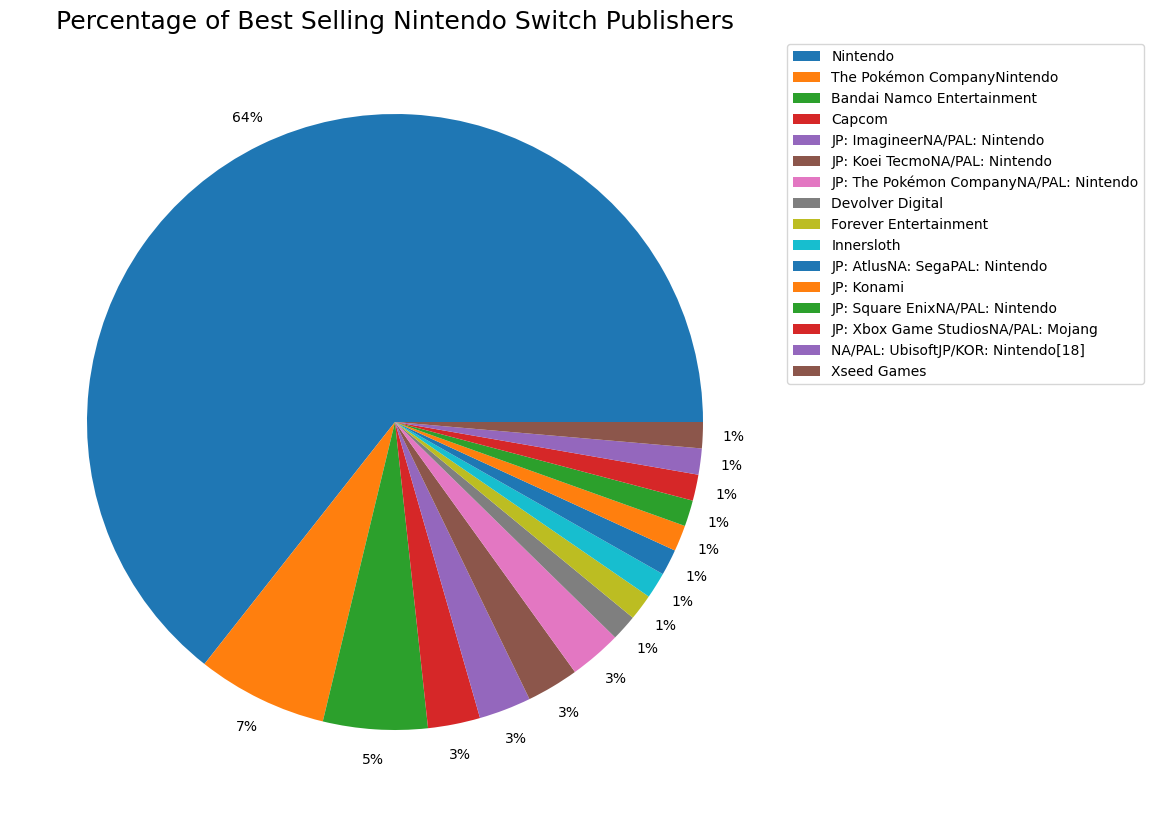

In [ ]:
switch['publisher'] = switch['publisher'].replace(['.mw-parser-output .plainlist ol,.mw-parser-output .plainlist ul{line-height:inherit;list-style:none;margin:0;padding:0}.mw-parser-output .plainlist ol li,.mw-parser-output .plainlist ul li{margin-bottom:0}JP: Koei TecmoNA/PAL: Nintendo'], 'JP: Koei TecmoNA/PAL: Nintendo')

cDF = switch[['publisher']].value_counts()

cDF = cDF.to_frame().reset_index().set_index('publisher').rename(columns={0: ''})

#plot
ax = cDF.plot.pie(y='', autopct='%1.0f%%', legend=False, figsize=(10,10), pctdistance=1.1, labeldistance=None)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(label="Percentage of Best Selling Nintendo Switch Publishers",fontsize=18)
plt.show()

The pie chart above shows the best selling Nintendo Switch publishers by the percentage of best selling Switch games they each published. 

To clarify, the percentage for each publisher is not determined by copies sold, but by the count of individual best selling games they published. For example, let's say "Foo" and "Bar" are the only best-selling publishers for the Nintendo Switch. "Foo" has published 7 best selling switch games, while "Bar" has only published 3 best selling switch games. Therefore, Foo has published 70% of the best selling Switch games [7/(3+7)=.7=70%], and Bar has published 30% [3/(3+7)=.3=30%] of the best selling Switch games. 

Out of the best selling publishers for the Nintendo Switch, Nintendo is the most popular (again), by a margin of 57 percent. Excluding publishers owned or controlled by Nintendo, however, Bandai Namco Entertainment is the most popular Nintendo Switch publisher, having published 5% of the best selling Switch games.

Devolver Digital, Forever Entertainment, Innersloth, Atlus, Konami, Square Enix, Xbox Game Studios, Nintendo[18], and Xseed Games (going by their Japanese names) are tied as the least popular Nintendo Switch publishers, with each publishing 1% of the best selling Switch games.


## Grouped Data Summary

                   copies sold (per million)
genre                                       
Role-playing                           69.94
Platformer                             63.52
Action-adventure                       52.11
Kart racing                            48.41
Social simulation                      40.17


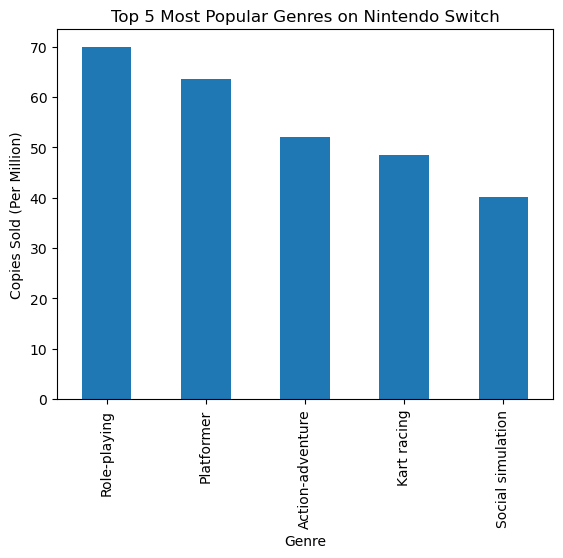

In [ ]:
gDF = switch.groupby('genre').sum().sort_values(by='copies_sold', ascending=False).head()
gDF['copies_sold'] = gDF['copies_sold'].div(pow(10,6)).round(2)

print(gDF.rename(columns={'copies_sold': 'copies sold (per million)'}))

#plot
gDF.plot.bar(legend=False, title="Top 5 Most Popular Genres on Nintendo Switch")
plt.xlabel('Genre')
plt.ylabel('Copies Sold (Per Million)')
plt.show()

The bar chart above shows the top five most popular video game genres on the Nintendo Switch, which was found by grouping the Nintendo Switch data by genre, finding the sum of copies sold for each group, and taking the 5 groups with the greatest number of copies sold. "Role-playing" is shown to be the most popular genre on the Nintendo Switch, with best-selling games in the genre having sold 69.94 million copies. Also, the five most popular genres on the Nintendo Switch have sold at least 40.17 million copies of best selling Switch games.

                            copies sold (per million)
genre                                                
Bullet hell                                      1.00
Simulationrole-playing                           1.00
Stealth                                          1.00
Hack and slashRole-playing                       1.00
Programming                                      1.06


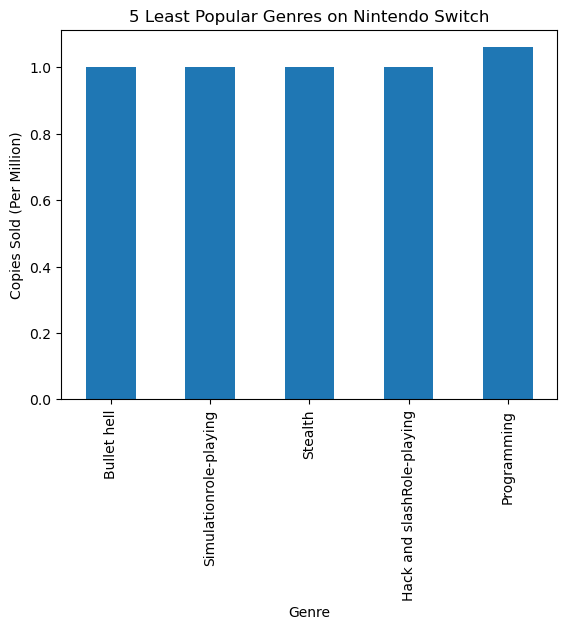

In [ ]:
gDF1 = switch.groupby('genre').sum().sort_values(by='copies_sold', ascending=True).head()
gDF1['copies_sold'] = gDF1['copies_sold'].div(pow(10,6)).round(2)

print(gDF1.rename(columns={'copies_sold': 'copies sold (per million)'}))

#plot
gDF1.plot.bar(legend=False, title="5 Least Popular Genres on Nintendo Switch")
plt.xlabel('Genre')
plt.ylabel('Copies Sold (Per Million)')
plt.show()

The bar chart above shows the five least popular video game genres on the Nintendo Switch, which was found by grouping the Nintendo Switch data by genre, finding the sum of copies sold for each group, and taking the 5 groups with the least number of copies sold. "Bullet hell", "Simulation role-playing", "Stealth", and "Hack and slash Role-playing" are tied as being the very least popular genres on the Nintendo Switch, with each genre having sold 1 million copies of best selling Switch games.

## Merged Data Summary

In [ ]:
mDF = pd.merge(switch['developer'], n3DS['developer']).drop_duplicates()
mDF = pd.merge(mDF, gameboy.rename(columns={'Developer(s)': 'developer'})['developer']).drop_duplicates().reset_index(drop=True)

print(mDF)

                   developer
0                 Game Freak
1                     Capcom
2             HAL Laboratory
3  Camelot Software Planning
4        Intelligent Systems


The data frame above shows the developers that have created best selling video games across the Nintendo Switch, Nintendo 3DS, and Gameboy, which was found by merging the three datasets by developer. These developers have managed to create best selling video games for three different video game consoles across 28 years.

## Conclusion

Through analysis of the three datasets, the following observations were made:
1. Overall, Nintendo is (technically) both the most popular developer and publisher for the Nintendo Switch
2. Independent of Nintendo, Game Freak is the most popular developer for the Nintendo Switch
3. Independent of Nintendo, Bandai Namco Entertainment is the most popular publisher for the Nintendo Switch
4. Dodge Roll, Noble Muffins, Atlus, and Marvelous are tied as the very least popular developers for the Nintendo Switch
5. Devolver Digital, Forever Entertainment, Innersloth, Atlus, Konami, Square Enix, Xbox Game Studios, Nintendo[18], and Xseed Games (going by their Japanese names) are tied as the very least popular publishers for the Nintendo Switch
6. "Role-playing" is the most popular video game genre on the Nintendo Switch
7. "Bullet hell", "Simulation role-playing", "Stealth", and "Hack and slash Role-playing" are tied as being the very least popular genres on the Nintendo Switch
8. Game Freak, Capcom, HAL Laboratory, Camelot Software Planning, and Intelligent Systems are all video game companies that have survived to make best selling video games for the Nintendo Switch, Nintendo 3DS, and Gameboy

To answer the questions proposed in the introduction:
1. Overall, the safest way of producing a best selling video game for the Nintendo Switch is for its genre to be "Role-playing", its developer be Nintendo EPD, and its publisher be Nintendo
2. Independent of Nintendo, the safest way of producing a best selling video game for the Nintendo Switch is for its genre to be "Role-playing", its developer be Game Freak, and its publisher be Bandai Namco Entertainment
3. There are many risky, or least safe ways to produce a best selling video game for the Nintendo Switch. One such possible combination is to have the video game's genre be "Bullet hell", its developer be Dodge Roll, and its publisher be Forever Entertainment.

Ultimately, this analysis can be used both a general guide of what to do to produce a best selling video game for the Nintendo Switch, and what to avoid when attempting to produce a best selling Switch game.